Images extracted successfully!
Converted 16 images to grayscale successfully!


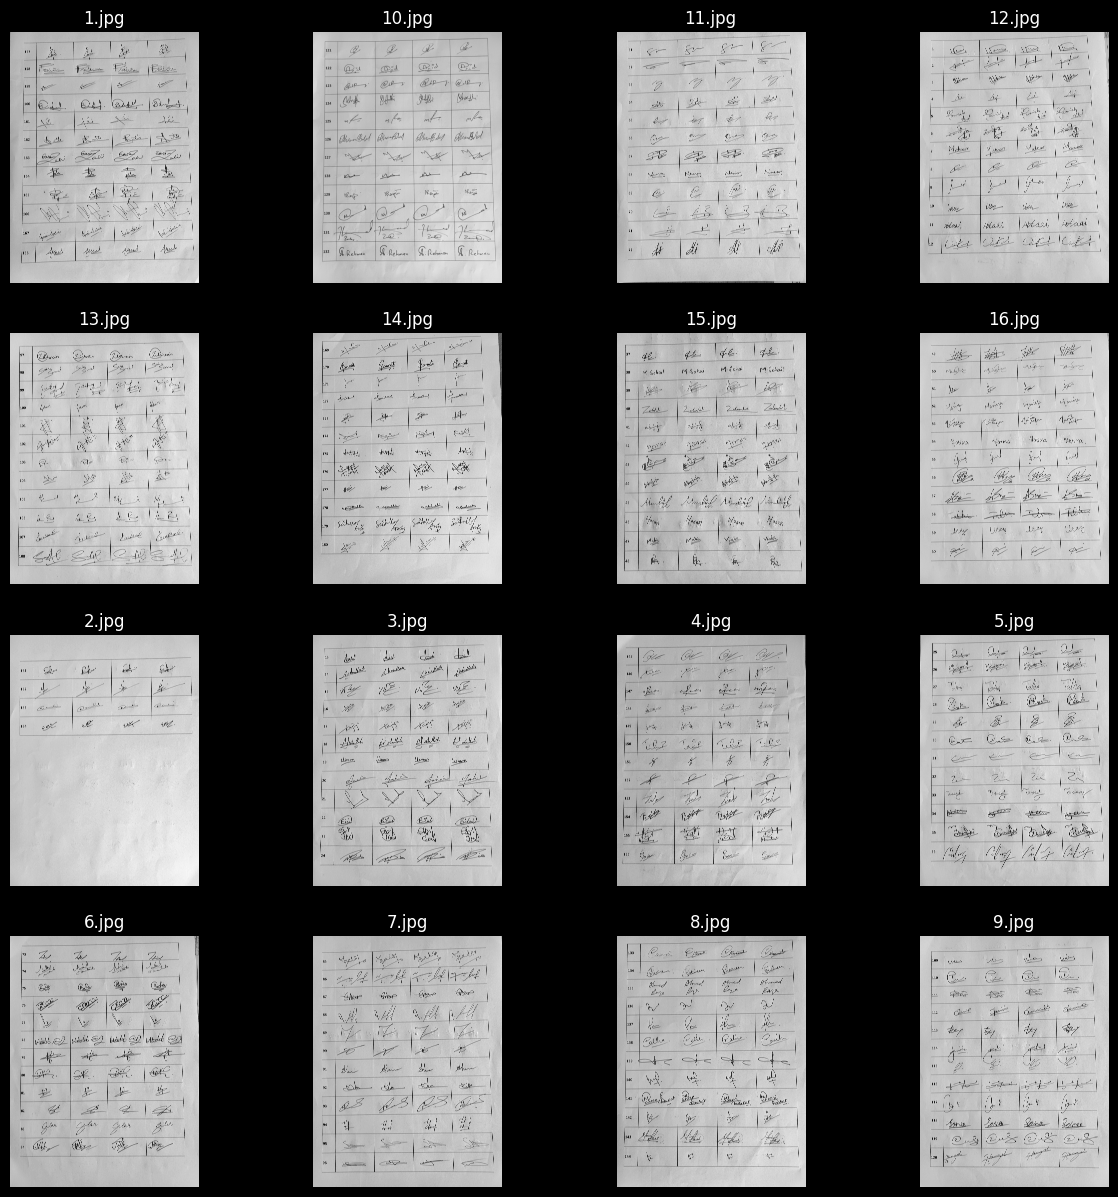

In [63]:
import os
import zipfile
import matplotlib.pyplot as plt
import cv2

# Step 1: Upload the zip file manually and extract it
from google.colab import files

# Uncomment the line below to upload the zip file manually
# uploaded = files.upload()

# Specify the zip file name
zip_file_name = 'signatures.zip'  # Change this to the name of your zip file if different
extract_path = '/content/images/'  # Folder to extract images

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('Images extracted successfully!')

# Step 3: Set the directory for grayscale images (using `/content/renamed_signatures/`)
output_dir = '/content/renamed_signatures/'
os.makedirs(output_dir, exist_ok=True)

# Step 4: Get the list of extracted image files
image_files = [f for f in os.listdir(extract_path) if f.endswith('.jpg') or f.endswith('.png')]

# Step 5: Convert the images to grayscale and save them
def convert_to_grayscale(image_files, output_dir, extract_path):
    for image_file in image_files:
        old_path = os.path.join(extract_path, image_file)
        new_path = os.path.join(output_dir, image_file)  # Use the original name

        # Read the image
        img = cv2.imread(old_path)
        # Convert to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Save the grayscale image
        cv2.imwrite(new_path, img_gray)

    print(f"Converted {len(image_files)} images to grayscale successfully!")

# Step 6: Display all grayscale images
def display_images(output_dir):
    grayscale_files = sorted([f for f in os.listdir(output_dir) if f.endswith('.jpg') or f.endswith('.png')])

    # Create a figure with a black background
    plt.figure(figsize=(15, 15), facecolor='black')

    # Display each image in a grid
    for i, image_file in enumerate(grayscale_files):
        image_path = os.path.join(output_dir, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the grayscale image

        # Plot the image
        plt.subplot(4, 4, i + 1)  # Adjust grid size as needed
        plt.imshow(img, cmap='gray')  # Display in grayscale
        plt.title(image_file, color='white')  # Set title color to white for better visibility
        plt.axis('off')
        plt.gca().set_facecolor('black')  # Set axis background color to black

    plt.show()

# Step 7: Execute the functions
convert_to_grayscale(image_files, output_dir, extract_path)
display_images(output_dir)


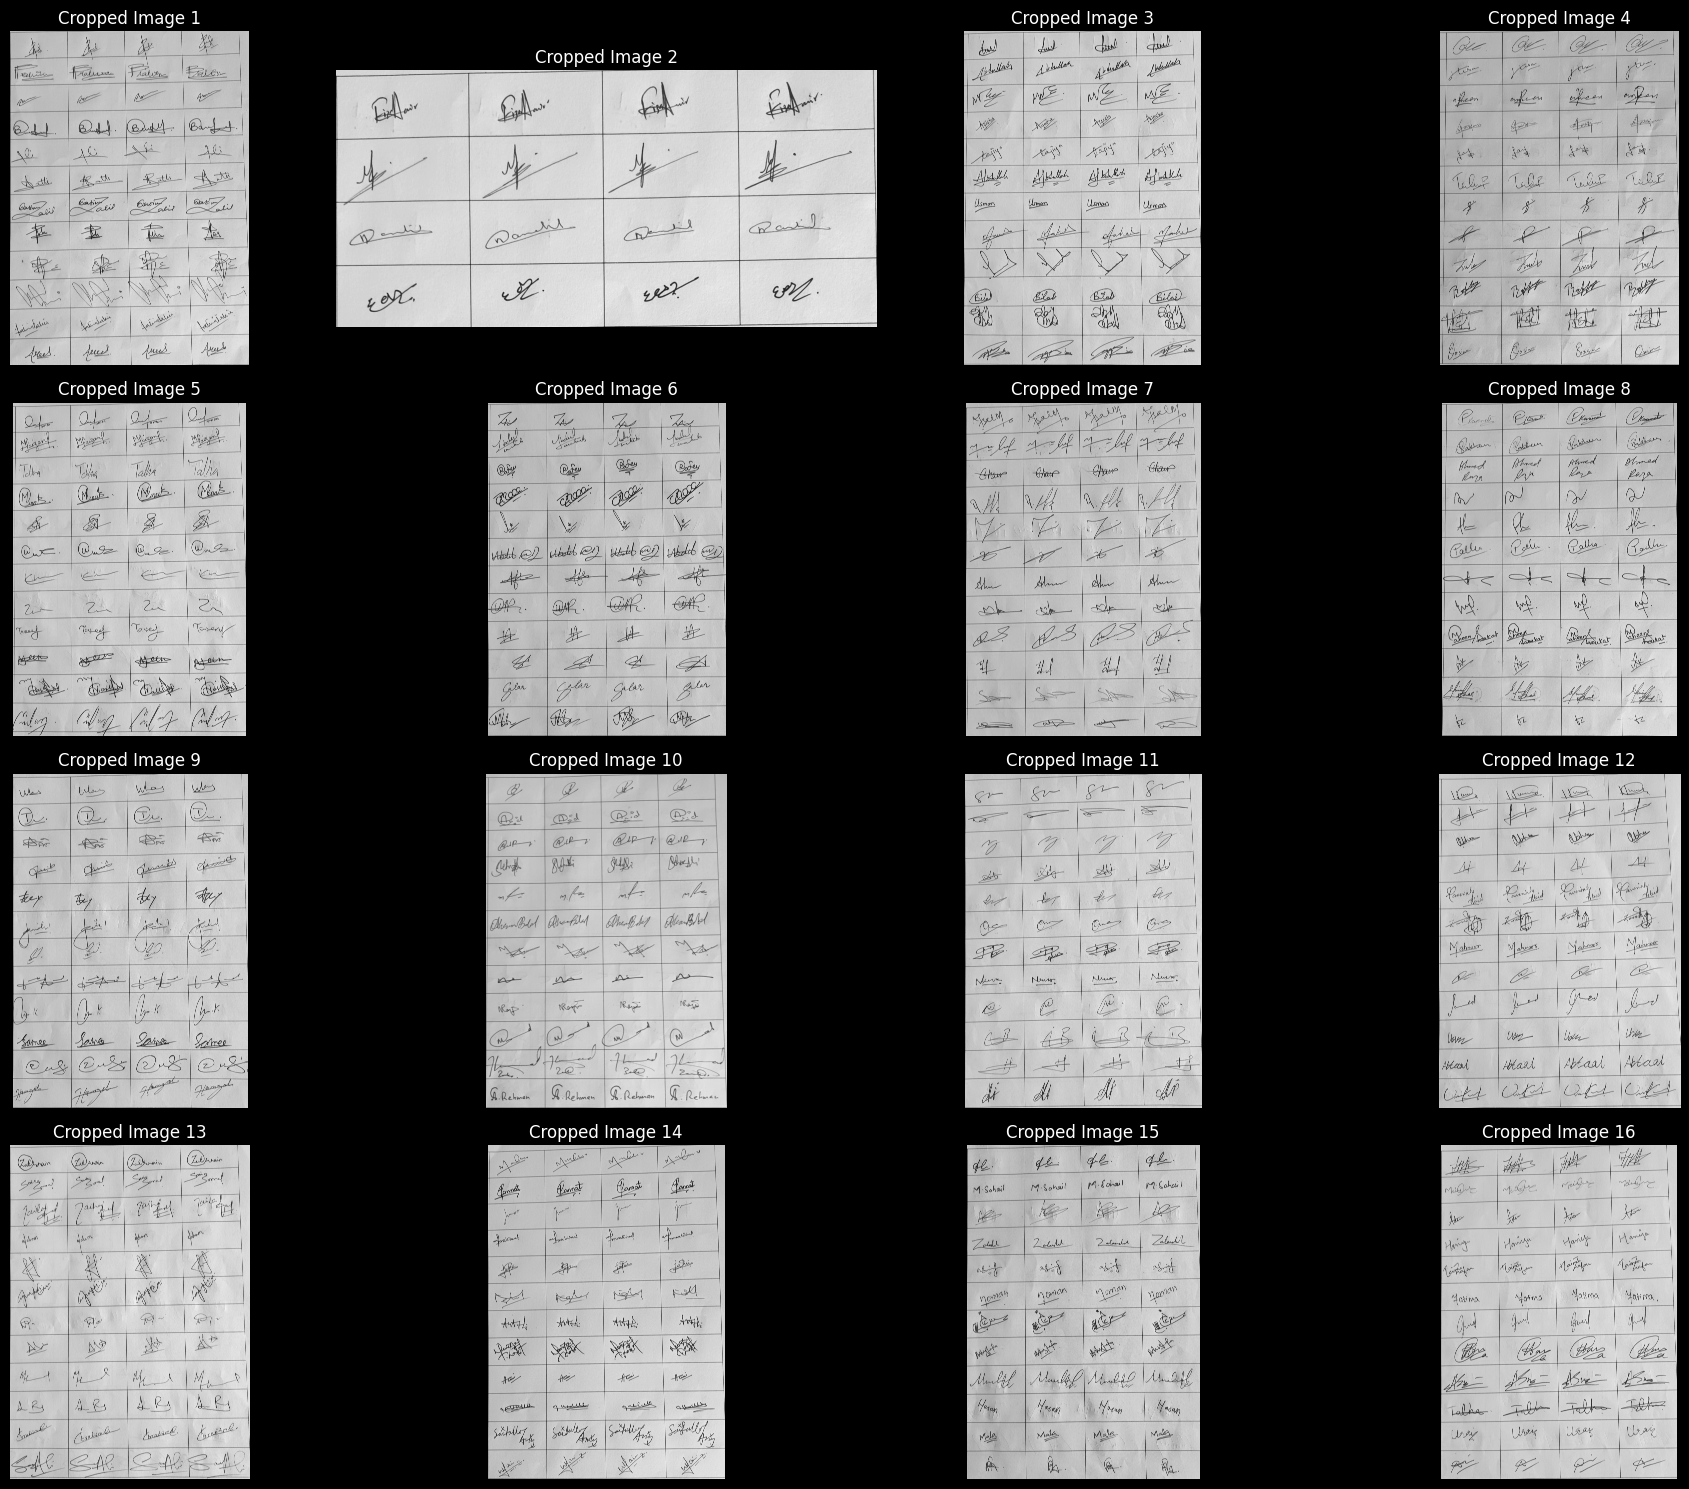

In [64]:
import cv2
import matplotlib.pyplot as plt
import os  # Import os module to handle directories

# Function to crop an image
def crop_image(image_path, top, bottom, left, right):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the height and width of the original image
    height, width = image.shape

    # Crop the image
    cropped_image = image[top:height - bottom, left:width - right]
    return cropped_image

# Step 1: Define the paths for all images
image_paths = [
    '/content/renamed_signatures/1.jpg',  # Image 1
    '/content/renamed_signatures/2.jpg',  # Image 2
    '/content/renamed_signatures/3.jpg',  # Image 3
    '/content/renamed_signatures/4.jpg',  # Image 4
    '/content/renamed_signatures/5.jpg',  # Image 5
    '/content/renamed_signatures/6.jpg',  # Image 6
    '/content/renamed_signatures/7.jpg',  # Image 7
    '/content/renamed_signatures/8.jpg',  # Image 8
    '/content/renamed_signatures/9.jpg',  # Image 9
    '/content/renamed_signatures/10.jpg',  # Image 10
    '/content/renamed_signatures/11.jpg',  # Image 11
    '/content/renamed_signatures/12.jpg',  # Image 12
    '/content/renamed_signatures/13.jpg',  # Image 13
    '/content/renamed_signatures/14.jpg',  # Image 14
    '/content/renamed_signatures/15.jpg',  # Image 15
    '/content/renamed_signatures/16.jpg',  # Image 16
]

# Define the cropping parameters for each image (top, bottom, left, right)
crop_parameters = [
    (340, 750, 830, 240),  # Image 1
    (800, 12800, 730, 220),  # Image 2
    (400, 650, 670, 400),   # Image 3
    (400, 680, 550, 500),   # Image 4
    (200, 700, 750, 300),   # Image 5
    (300, 970, 720, 500),   # Image 6
    (430, 500, 690, 350),   # Image 7
    (230, 650, 650, 350),   # Image 8
    (450, 630, 750, 400),   # Image 9
    (130, 350, 370, 100),   # Image 10
    (180, 750, 750, 250),    # Image 11
    (200, 950, 700, 350),    # Image 12
    (400, 550, 700, 250),    # Image 13
    (150, 950, 670, 450),     # Image 14
    (330, 450, 680, 300),     # Image 15
    (300, 750, 750, 350),     # Image 16
]

# Step 2: Crop all images
cropped_images = []
for index in range(len(image_paths)):
    cropped_images.append(crop_image(image_paths[index], *crop_parameters[index]))

# Step 3: Create directory for cropped images if it doesn't exist
output_dir = '/content/cropped_images'
os.makedirs(output_dir, exist_ok=True)

# Step 4: Save all cropped images
for i, cropped_image in enumerate(cropped_images):
    output_path = os.path.join(output_dir, f'cropped_image_{i + 1}.jpg')
    cv2.imwrite(output_path, cropped_image)

# Optional: Display all cropped images
num_images = len(cropped_images)
cols = 4  # Number of columns for the grid layout
rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed

plt.figure(figsize=(20, 15), facecolor='black')  # Adjust figure size as needed

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)  # Create subplot for each image
    plt.imshow(cropped_images[i], cmap='gray')
    plt.title(f"Cropped Image {i + 1}", color='white')
    plt.axis('off')
    plt.gca().set_facecolor('black')  # Set axis background color to black

plt.tight_layout()
plt.show()


Total cropped rows saved: 183
Total images saved in '/content/cropped_rows': 183


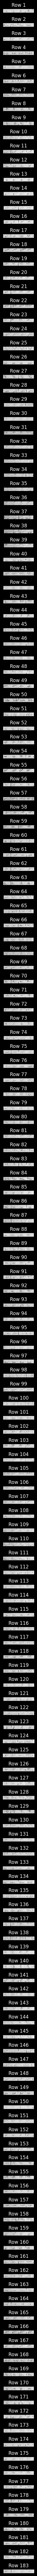

In [65]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to split an image into rows
def split_into_rows(image, avg_row_height):
    height, width = image.shape
    rows = []

    # Loop through the image and split into rows
    for i in range(0, height, avg_row_height):
        row = image[i:i + avg_row_height, :]
        if row.size > 0:  # Check if the row is not empty
            rows.append(row)

    return rows

# Step 1: Load the cropped images
cropped_image_paths = [
    '/content/cropped_images/cropped_image_1.jpg',
    '/content/cropped_images/cropped_image_2.jpg',
    '/content/cropped_images/cropped_image_3.jpg',
    '/content/cropped_images/cropped_image_4.jpg',
    '/content/cropped_images/cropped_image_5.jpg',
    '/content/cropped_images/cropped_image_6.jpg',
    '/content/cropped_images/cropped_image_7.jpg',
    '/content/cropped_images/cropped_image_8.jpg',
    '/content/cropped_images/cropped_image_9.jpg',
    '/content/cropped_images/cropped_image_10.jpg',
    '/content/cropped_images/cropped_image_11.jpg',
    '/content/cropped_images/cropped_image_12.jpg',
    '/content/cropped_images/cropped_image_13.jpg',
    '/content/cropped_images/cropped_image_14.jpg',
    '/content/cropped_images/cropped_image_15.jpg',
    '/content/cropped_images/cropped_image_16.jpg'  # Path for cropped image 16
]

# Load images in grayscale
cropped_images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in cropped_image_paths]

# Step 2: Split cropped images with their respective average row heights
avg_row_heights = [570, 600, 570, 600, 580, 550, 590, 585, 570, 290, 580, 558, 575, 572, 593, 580]
rows_images = [split_into_rows(cropped_images[i], avg_row_heights[i]) for i in range(len(cropped_images))]

# Step 3: Drop the last row of each image except for images 2, 7, and 16
for i in range(len(rows_images)):
    if i not in [1, 6, 15]:  # Indices for images 2, 7, and 16
        if rows_images[i]:  # Check if there are rows to drop
            rows_images[i].pop()  # Drop the last row

# Step 4: Create a directory to store cropped rows
output_folder = '/content/cropped_rows'
os.makedirs(output_folder, exist_ok=True)

# Step 5: Save cropped rows to the specified directory
student_counter = 1  # Initialize a counter for naming
for img_index, rows in enumerate(rows_images):
    for row_index, row in enumerate(rows):
        # Construct the filename for the row as student1, student2, ...
        filename = f"student{student_counter}.jpg"
        student_counter += 1  # Increment counter for the next student
        # Save the row image
        cv2.imwrite(os.path.join(output_folder, filename), row)

# Step 6: Count the total number of saved cropped rows
total_cropped_rows = sum(len(rows) for rows in rows_images)
print(f"Total cropped rows saved: {total_cropped_rows}")

# Step 7: Count the number of images saved in the cropped_rows folder
saved_images_count = len(os.listdir(output_folder))
print(f"Total images saved in '{output_folder}': {saved_images_count}")

# Step 8: Display all saved cropped rows
plt.figure(figsize=(10, total_cropped_rows * 0.5), facecolor='black')  # Adjust figure size as needed

for i in range(1, saved_images_count + 1):  # Loop through saved images
    img_path = os.path.join(output_folder, f"student{i}.jpg")
    row_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(total_cropped_rows, 1, i)  # Create a subplot for each row
    plt.imshow(row_image, cmap='gray')  # Display the row image
    plt.title(f"Row {i}", color='white')
    plt.axis('off')
    plt.gca().set_facecolor('black')  # Set axis background color to black

# Show all the saved rows
plt.tight_layout()
plt.show()


In [66]:
import cv2
import os

# Function to split a row into 4 equal columns
def split_into_columns(row_image):
    height, width = row_image.shape
    columns = []

    # Calculate the width of each column by dividing the image width by 4
    avg_col_width = width // 4

    # Loop through the row image and split into 4 equal columns
    for i in range(0, 4):
        start_col = i * avg_col_width
        end_col = start_col + avg_col_width if i < 3 else width  # Last column takes the remaining width
        column = row_image[:, start_col:end_col]
        columns.append(column)

    return columns

# Path to the folder containing cropped rows
output_folder = '/content/cropped_rows'
student_images = [f for f in os.listdir(output_folder) if f.startswith('student') and f.endswith('.jpg')]

# Folder to store segmented signatures (columns)
segmented_signatures_folder = '/content/segmented_signatures'

# Create the segmented_signatures folder if it doesn't exist
if not os.path.exists(segmented_signatures_folder):
    os.makedirs(segmented_signatures_folder)

# Process each row in the cropped_rows folder
for row_index, image_file in enumerate(student_images):
    # Load the row image
    row_image_path = os.path.join(output_folder, image_file)
    row_image = cv2.imread(row_image_path, cv2.IMREAD_GRAYSCALE)

    if row_image is None:
        print(f"Image {row_image_path} could not be loaded.")
        continue

    # Split the row image into 4 equal columns
    columns = split_into_columns(row_image)

    # Create a folder for the current row in segmented_signatures
    row_folder_name = f'row_{row_index + 1}'
    row_folder_path = os.path.join(segmented_signatures_folder, row_folder_name)

    if not os.path.exists(row_folder_path):
        os.makedirs(row_folder_path)

    # Save each column (signature) as an image in the current row folder
    for col_index, column in enumerate(columns):
        column_image_name = f'col_{col_index + 1}.jpg'
        column_image_path = os.path.join(row_folder_path, column_image_name)

        # Save the column image
        cv2.imwrite(column_image_path, column)

    print(f"Processed and saved columns for {row_folder_name}.")

print("Segmentation and saving complete.")


Processed and saved columns for row_1.
Processed and saved columns for row_2.
Processed and saved columns for row_3.
Processed and saved columns for row_4.
Processed and saved columns for row_5.
Processed and saved columns for row_6.
Processed and saved columns for row_7.
Processed and saved columns for row_8.
Processed and saved columns for row_9.
Processed and saved columns for row_10.
Processed and saved columns for row_11.
Processed and saved columns for row_12.
Processed and saved columns for row_13.
Processed and saved columns for row_14.
Processed and saved columns for row_15.
Processed and saved columns for row_16.
Processed and saved columns for row_17.
Processed and saved columns for row_18.
Processed and saved columns for row_19.
Processed and saved columns for row_20.
Processed and saved columns for row_21.
Processed and saved columns for row_22.
Processed and saved columns for row_23.
Processed and saved columns for row_24.
Processed and saved columns for row_25.
Processed

In [67]:
import os
import shutil
import random

# Paths
segmented_signatures_folder = '/content/segmented_signatures'
train_folder = '/content/train'
test_folder = '/content/test'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Iterate over each person's folder
for person_folder in os.listdir(segmented_signatures_folder):
    person_path = os.path.join(segmented_signatures_folder, person_folder)

    if os.path.isdir(person_path):  # Ensure it's a directory
        images = [f for f in os.listdir(person_path) if f.endswith('.jpg')]  # List of images

        # Ensure there are exactly 4 images
        if len(images) == 4:
            # Shuffle the images
            random.shuffle(images)

            # Split images into training and testing sets
            train_images = images[:3]  # First 3 images for training
            test_images = images[3:4]  # Last image for testing

            # Create folders for this person's training and testing images
            person_train_folder = os.path.join(train_folder, person_folder)
            person_test_folder = os.path.join(test_folder, person_folder)
            os.makedirs(person_train_folder, exist_ok=True)
            os.makedirs(person_test_folder, exist_ok=True)

            # Copy images to training folder
            for img in train_images:
                shutil.copy(os.path.join(person_path, img), os.path.join(person_train_folder, img))

            # Copy image to testing folder
            for img in test_images:
                shutil.copy(os.path.join(person_path, img), os.path.join(person_test_folder, img))

print("Train-test split completed!")


Train-test split completed!


In [68]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [69]:
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths for the train and test folders
train_folder = '/content/train'
test_folder = '/content/test'

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalizing training images
test_datagen = ImageDataGenerator(rescale=1./255)    # Normalizing test images

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(128, 128),  # Resizing images to 128x128
    batch_size=32,
    class_mode='categorical', # For multi-class classification
    shuffle=True              # Shuffle the data for training
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False              # No shuffle for test data
)


Found 549 images belonging to 183 classes.
Found 183 images belonging to 183 classes.


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Create the CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Define the input shape with an Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(len(os.listdir(train_folder)), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()  # This will print the model architecture


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 183)                 │          23,607 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,247 (12.70 MB)

 Trainable params: 3,328,247 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 701ms/step - accuracy: 0.0105 - loss: 5.2952 - val_accuracy: 0.0063 - val_loss: 5.2084
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 5.2324 - val_accuracy: 0.0000e+00 - val_loss: 5.2147
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 657ms/step - accuracy: 0.0040 - loss: 5.2104 - val_accuracy: 0.0063 - val_loss: 5.2102
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 5.2000 - val_accuracy: 0.0000e+00 - val_loss: 5.2107
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 665ms/step - accuracy: 0.0018 - loss: 5.2129 - val_accuracy: 0.0063 - val_loss: 5.2075
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 5.2136 - val_accuracy: 0.0000e+00 - val_loss: 5.2161
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 665ms/step - accuracy: 0.0018 - loss: 5.2084 - val_accuracy: 0.0188 - val_loss: 5.2013
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0312 - los

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions and evaluate with confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Generate classification report
print(classification_report(y_true, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)


In [62]:
import shutil
import os

# Path to the segmented_signatures folder
segmented_signatures_folder = '/content/renamed_signatures'

# Check if the folder exists
if os.path.exists(segmented_signatures_folder):
    # Delete the folder and all its contents
    shutil.rmtree(segmented_signatures_folder)
    print(f"Deleted folder: {segmented_signatures_folder}")
else:
    print(f"Folder does not exist: {segmented_signatures_folder}")


Deleted folder: /content/renamed_signatures


In [ ]:
with zipfile.ZipFile('signatures.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

In [ ]:
if not os.path.exists('extracted'):
        os.makedirs('extracted')

In [ ]:
import shutil
shutil.rmtree('signatures', ignore_errors=True)
shutil.rmtree('extracted', ignore_errors=True)
shutil.rmtree('upload', ignore_errors=True)

In [ ]:
!rm -rf signatures extracted upload